<a href="https://colab.research.google.com/github/kondalraop/Comparing-Classifiers/blob/main/Comparing_classifiers_bank_marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

According to the Materials and Methods section of the paper, the dataset was gathered from 17 marketing campaigns conducted between May 2008 and November 2010, comprising a total of 79,354 customer contacts.

In  telephone marketing campaign, clients were offered an appealing long-term deposit product with competitive interest rates. Information from each contact—such as the client’s job, marital status, education level, and whether they held housing or personal loans—was recorded as part of the interaction.

The outcome of each contact was recorded as either a success or a failure, representing the target variable. Across the entire dataset, there were 6,499 successful subscriptions, corresponding to a success rate of approximately 8%.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [4]:
df = pd.read_csv('/content/sample_data/bank-additional-full.csv', sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



Evaluate data quality , classify features, check relationships , assess correlations.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
#check data for null values
df.isna().any()

,0
age,False
job,False
marital,False
education,False
default,False
housing,False
loan,False
contact,False
month,False
day_of_week,False


In [9]:
# Change Y feature name to a more meaningful name
df.rename(columns = {'y':'subscribed'}, inplace = True)

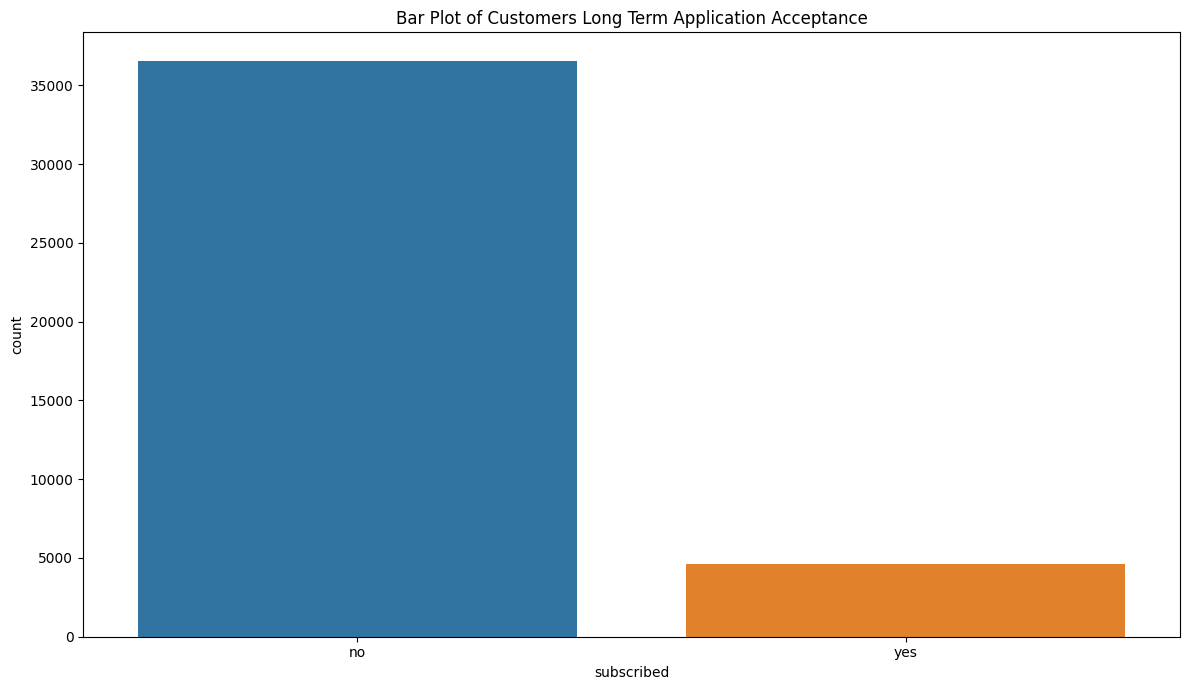

In [10]:
# Bar plot of customer count that said yes to term deposit vs no
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True

# count plot on two categorical variable
ax = sns.countplot(x ='subscribed', hue = "subscribed", data = df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance')


# Show the plot
plt.show()

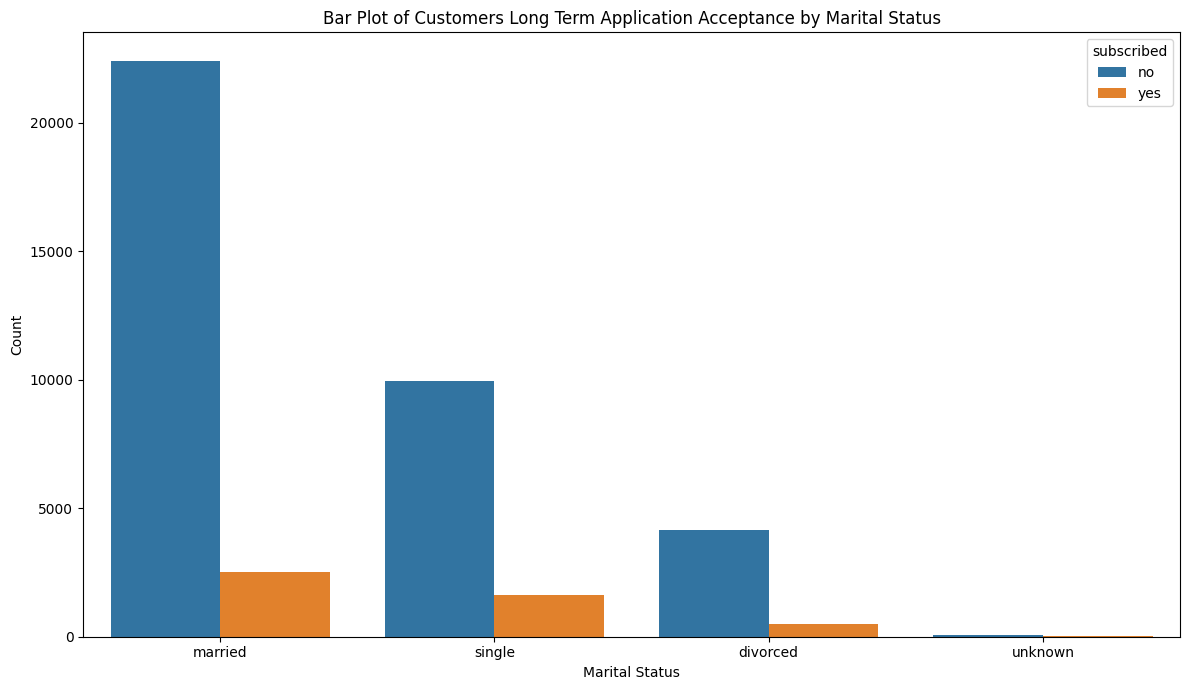

In [11]:
# Bar plot for customer application acceptance by marital status

plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x ='marital', hue = "subscribed", data = df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Marital Status')

# Setting the X and Y labels
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')

# Show the plot
plt.show()

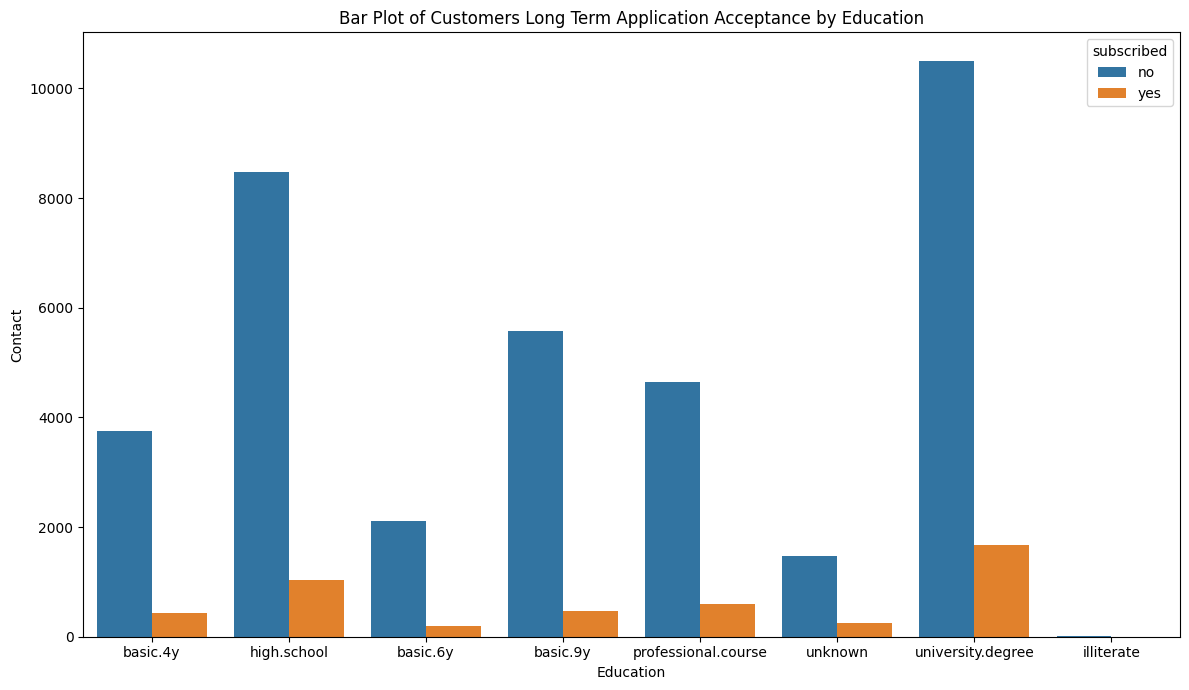

In [12]:
# Bar plot of count of accepted term deposit application by Education
ax = sns.countplot(x ='education', hue = "subscribed", data = df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Education')

# Setting the X and Y labels
ax.set_ylabel('Contact')
ax.set_xlabel('Education')

# Show the plot
plt.show()

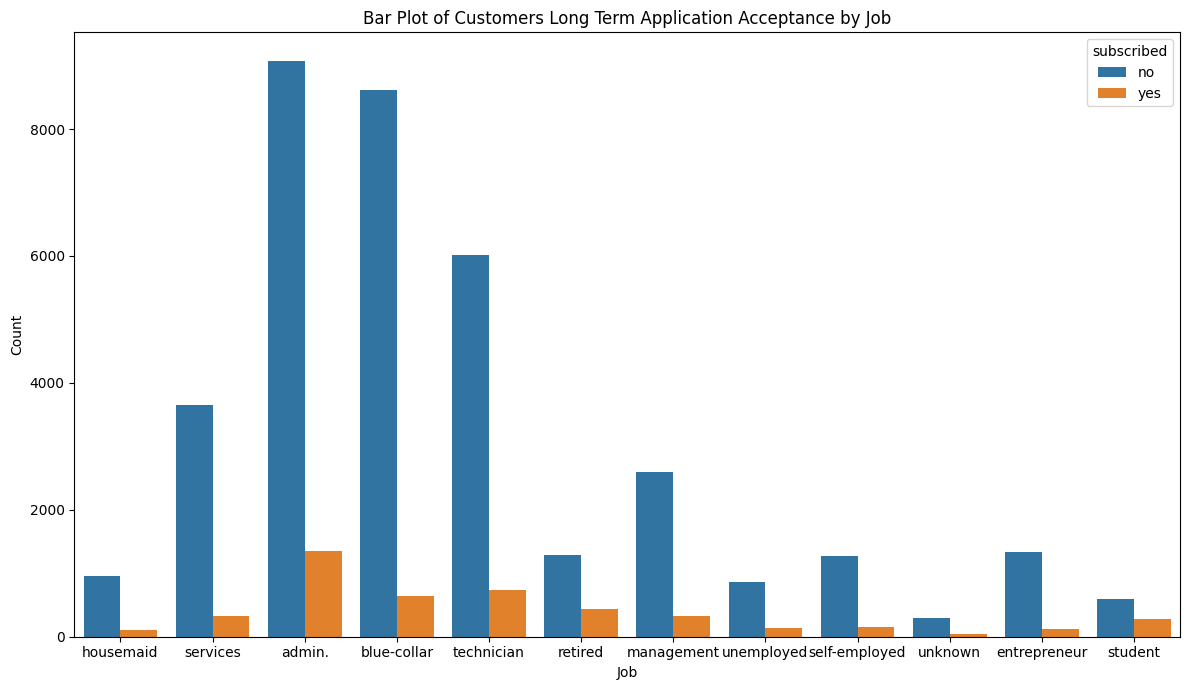

In [13]:
# Bar plot of count of accepted term deposit application by job
ax = sns.countplot(x ='job', hue = "subscribed", data = df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Job')

# Setting the X and Y labels
ax.set_xlabel('Job')
ax.set_ylabel('Count')

# Show the plot
plt.show()

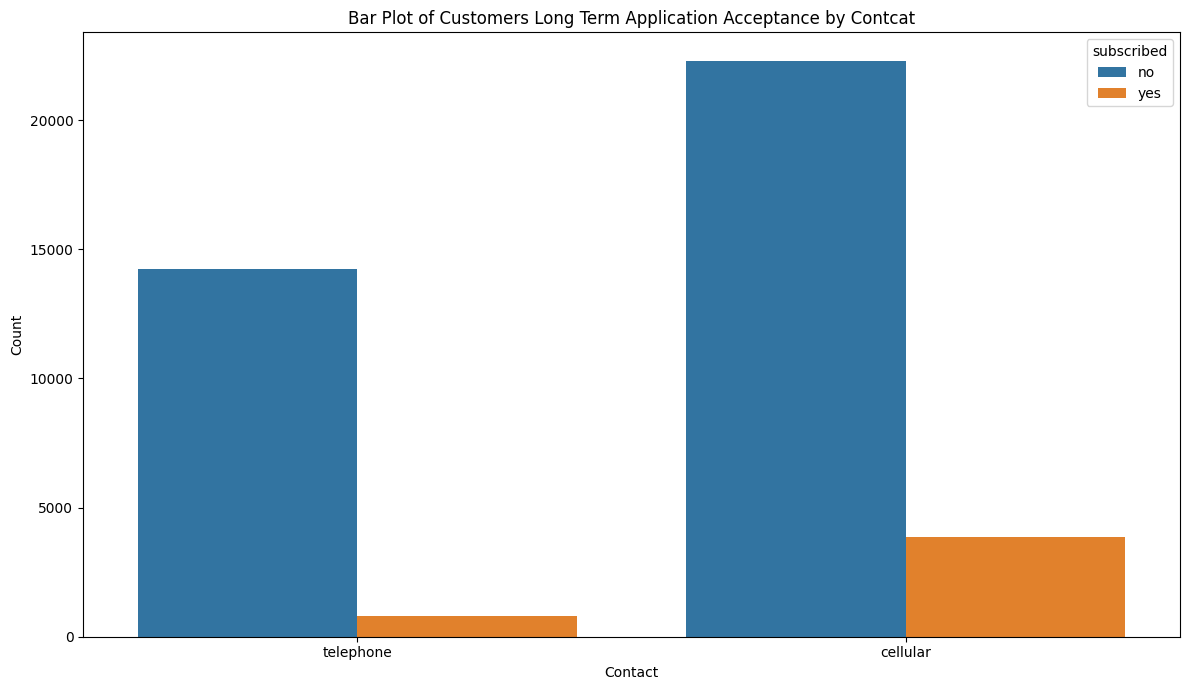

In [14]:
# Bar plot of count of accepted term deposit application by contact type
ax = sns.countplot(x ='contact', hue = "subscribed", data = df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Contcat')

# Setting the X and Y labels
ax.set_xlabel('Contact')
ax.set_ylabel('Count')

# Show the plot
plt.show()

In [15]:
# Create a new df with customers where subscribed = yes
bank_df=df.query("subscribed == 'yes'")
bank_df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
182,42,blue-collar,married,basic.9y,no,yes,yes,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
286,39,housemaid,married,basic.9y,no,yes,no,telephone,may,mon,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
388,28,unknown,single,unknown,unknown,yes,yes,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
389,44,services,married,high.school,no,yes,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
446,42,technician,married,professional.course,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [16]:
print('Number of Successful campaign records', bank_df.shape)



Number of Successful campaign records (4640, 21)


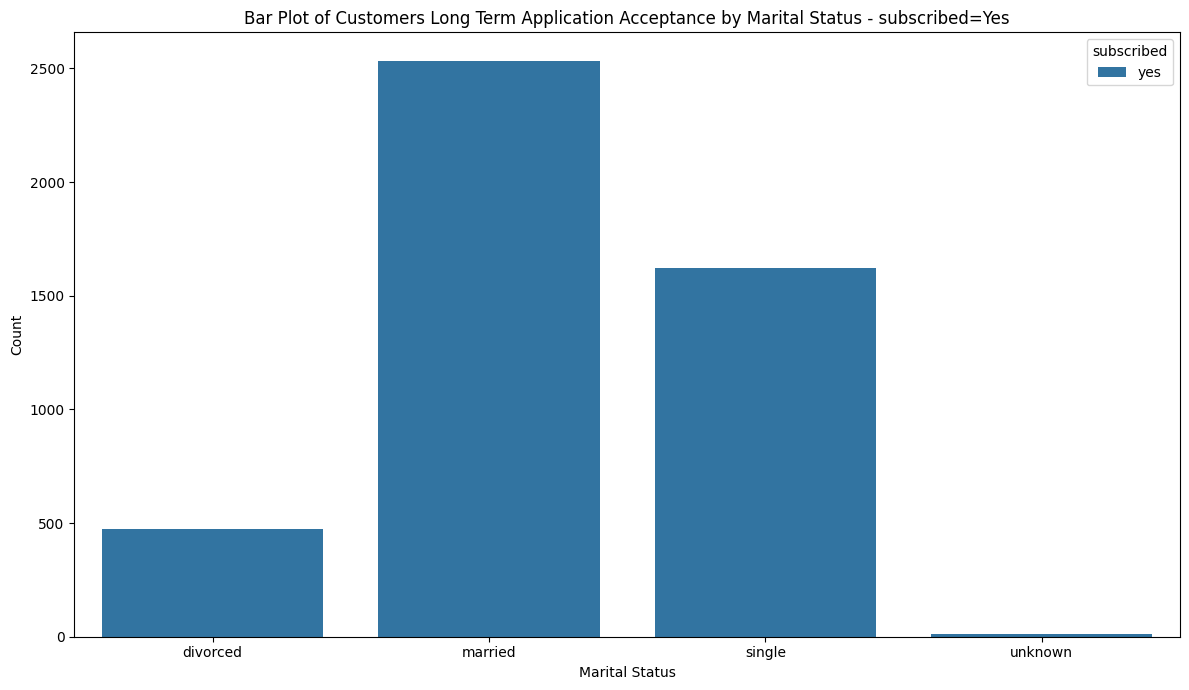

In [21]:
# count plot on two categorical variable

ax = sns.countplot(x =bank_df['marital'], hue = bank_df["subscribed"], data = df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Marital Status - subscribed=Yes')


# Setting the X and Y labels
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')

# Show the plot
plt.show()

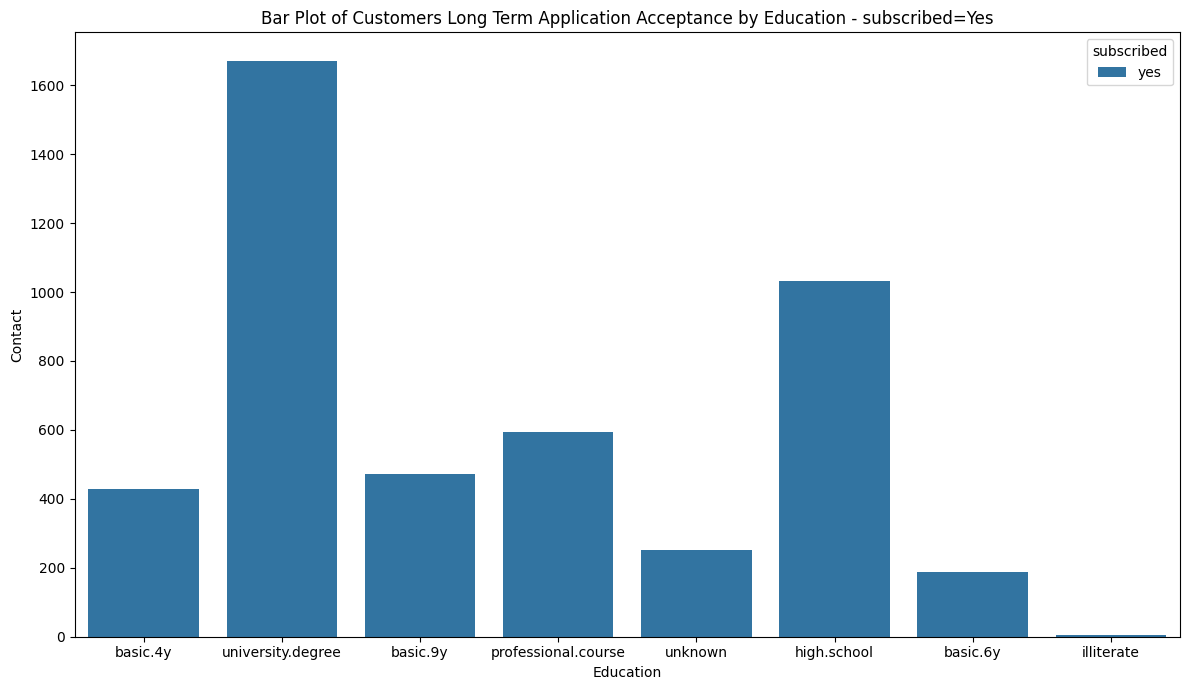

In [22]:
# Bar plot of count of accepted term deposit application by Education
ax = sns.countplot(x =bank_df['education'], hue = bank_df["subscribed"], data = df)
# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Education - subscribed=Yes')

# Setting the X and Y labels
ax.set_ylabel('Contact')
ax.set_xlabel('Education')

# Show the plot
plt.show()

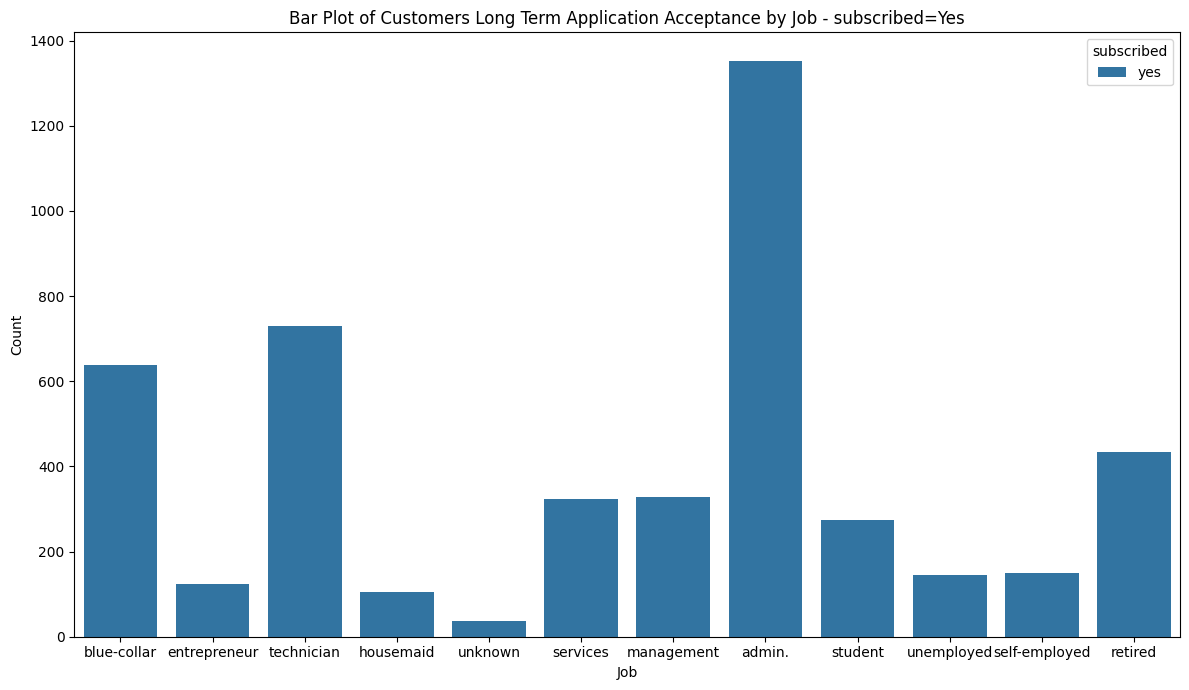

In [23]:
# Bar plot of count of accepted term deposit application by job
ax = sns.countplot(x ='job', hue = "subscribed", data = bank_df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Job - subscribed=Yes')

# Setting the X and Y labels
ax.set_xlabel('Job')
ax.set_ylabel('Count')

# Show the plot
plt.show()

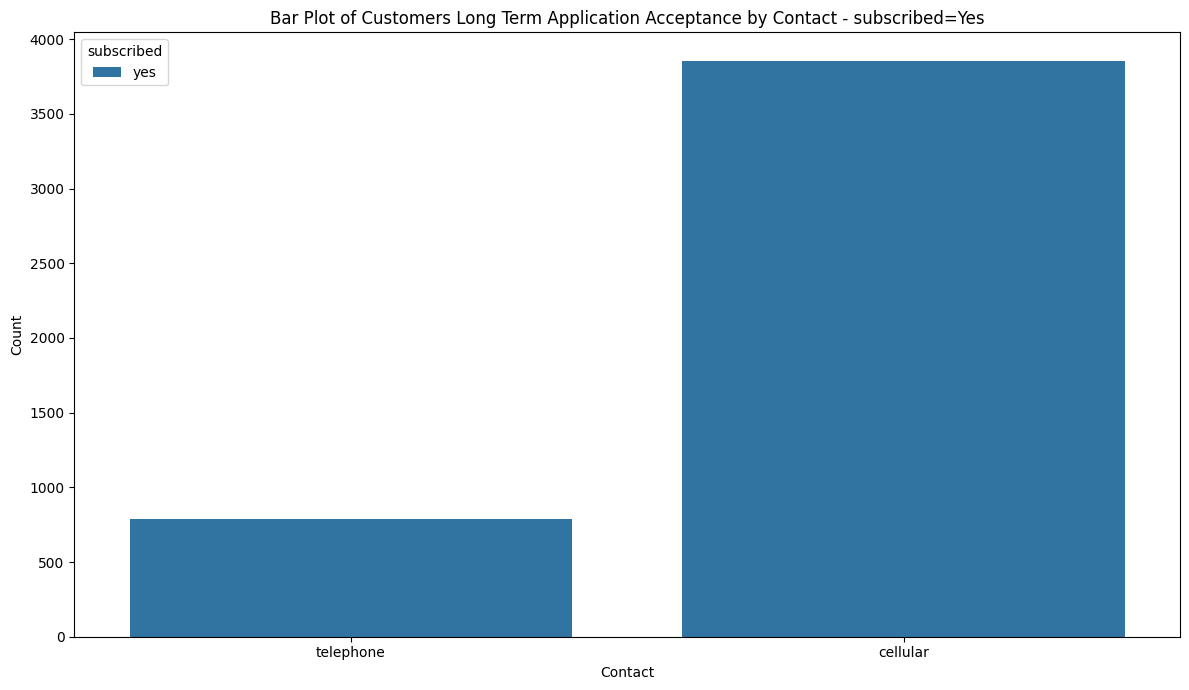

In [24]:
#Bar plot acceptance by contact
ax = sns.countplot(x ='contact', hue = "subscribed", data = bank_df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Customers Long Term Application Acceptance by Contact - subscribed=Yes')

# Setting the X and Y labels
ax.set_xlabel('Contact')
ax.set_ylabel('Count')

# Show the plot
plt.show()

**Observations**:

Marital Status: More number of Married customers subscribed than single

Education: University degree folks subscribed than others

Job: Admin role subscribed more than others jobs

Campaign was successul with folks that use cellular phones

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The goal of this project is to improve the effectiveness of the bank’s direct marketing campaigns by identifying which clients are most likely to subscribe to a term deposit. By analyzing historical campaign data, we aim to build a predictive system that helps the marketing team target potential customers more efficiently, reducing costs and increasing campaign success rates.

To enable the bank’s marketing team to improve targeting efficiency and campaign effectiveness by predicting customer likelihood to subscribe to a term deposit, based on historical campaign data.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [26]:
# Create a dataset with columns for features and deposit for target column

# list of features
feature_cols = [
    'job', 'marital', 'education', 'default', 'housing',
    'loan', 'contact'
]


X = df[feature_cols]
y = df['subscribed']

X.head(10)

,job,marital,education,default,housing,loan,contact
0,housemaid,married,basic.4y,no,no,no,telephone
1,services,married,high.school,unknown,no,no,telephone
2,services,married,high.school,no,yes,no,telephone
3,admin.,married,basic.6y,no,no,no,telephone
4,services,married,high.school,no,no,yes,telephone
5,services,married,basic.9y,unknown,no,no,telephone
6,admin.,married,professional.course,no,no,no,telephone
7,blue-collar,married,unknown,unknown,no,no,telephone
8,technician,single,professional.course,no,yes,no,telephone
9,services,single,high.school,no,yes,no,telephone


In [27]:
#Get the count by each feature
#X['default'].value_counts()
#X['contact'].value_counts()
X['education'].value_counts()
#X['job'].value_counts()

,count
education,
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


In [28]:
#Since dataset has mixed data types(numeric and catagorical), for clean and
#consistent preprocessing use column_transformer before feeding data to model

preprocessor = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                        ['job', 'marital', 'education','default','contact']),
                                      (OrdinalEncoder(), ['housing','loan']),
                                      remainder='passthrough')

preprocessor.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['job', 'marital', 'education', 'default',
                                  'contact']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['housing', 'loan'])])

In [29]:
#To convert catagorical labels into numeric values use LabelEncoder
le = LabelEncoder()
le.fit_transform(y)

array([0, 0, 0, ..., 0, 1, 0])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [31]:
#decision tree baseline model
from sklearn.pipeline import Pipeline
decisiontree_pipe = Pipeline ([
    ('transformer', preprocessor),
    ('scale', StandardScaler(with_mean=False)),
    ('model', DecisionTreeClassifier(max_depth=5))
])

In [32]:
%%time
# Train the classifiers
dtc = decisiontree_pipe.fit(X_train, y_train)

#Model to predict the class labels of the test set:
dtc_pred = dtc.predict(X_test)

CPU times: user 171 ms, sys: 11.9 ms, total: 183 ms
Wall time: 188 ms


In [33]:
# Evaluate the performance of the model, to calculate the accuracy, precision, recall, and f1-score:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, dtc_pred)
precision = precision_score(y_test, dtc_pred, average='macro')
recall = recall_score(y_test, dtc_pred, average='macro')
f1 = f1_score(y_test, dtc_pred, average='macro')

print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1-score: {:.6f}".format(f1))

Accuracy: 0.887513
Precision: 0.443792
Recall: 0.499954
F1-score: 0.470202


To visualize the results, we can use a confusion matrix. A confusion matrix is a table that is used to define the performance of a classification algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). The main diagonal of the matrix represents the correct predictions, while the off-diagonal elements represent the incorrect predictions. The overall performance of the model can be calculated by using metrics like accuracy, precision, recall and F1-score by combining the values of TP, FP, TN and FN.

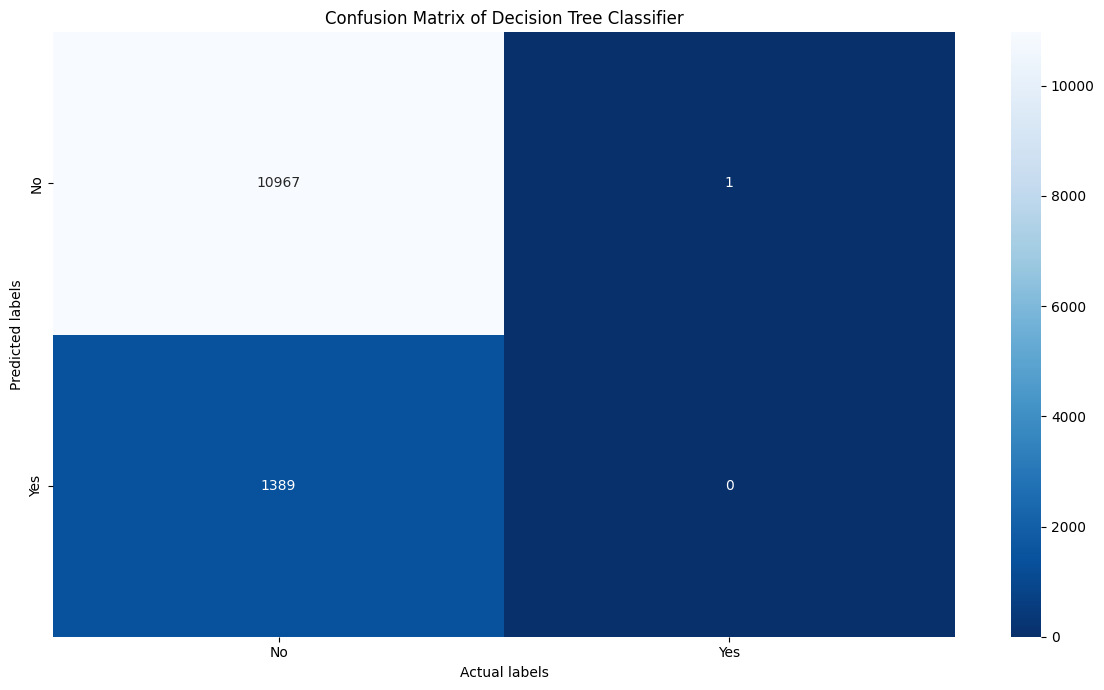

In [34]:
#import seaborn as sns
ax= plt.subplot()
conf_matrix = confusion_matrix(y_test, dtc_pred)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues_r', fmt = 'd', ax=ax)

# labels, title and ticks
ax.set_xlabel('Actual labels');ax.set_ylabel('Predicted labels');
ax.set_title('Confusion Matrix of Decision Tree Classifier');
ax.xaxis.set_ticklabels(['No', 'Yes']);
ax.yaxis.set_ticklabels(['No', 'Yes']);

plt.show()

A confusion matrix is an N × N table used to evaluate the performance of a classification model, where N represents the number of target classes. It compares the actual target values with the predicted values generated by the model. Ideally, a good model will have high True Positive (TP) and True Negative (TN) rates, and low False Positive (FP) and False Negative (FN) rates.

For the DecisionTreeClassifier, the confusion matrix shows a high number of True Positives but no True Negatives. Combined with an accuracy of 0.89, this suggests that the model performs fairly well overall, although the recall and precision scores (around 0.5 and below 0.5, respectively) indicate room for improvement.

A low recall score (< 0.5) indicates a high number of False Negatives, which may result from an imbalanced dataset or suboptimal hyperparameter tuning.

A low precision score (< 0.5) indicates a high number of False Positives, which can also stem from class imbalance or untuned model parameters.

It’s important to note that the confusion matrix may appear counterintuitive because the dataset is heavily skewed toward customers who responded “No” to the long-term deposit product. Therefore, in this case, the “No” class appears as the True Positive, with a high count of 10,967, reflecting the dataset’s imbalance rather than purely model performance.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [35]:
#Logistic Regression simple model

logr_pipe = Pipeline ([
    ('transformer', preprocessor),
    ('scale', StandardScaler(with_mean=False)),
    ('model', LogisticRegression())
])

In [36]:
%%time
# Train the classifiers
logr = logr_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
logr_pred = logr.predict(X_test)

CPU times: user 275 ms, sys: 5.03 ms, total: 281 ms
Wall time: 218 ms


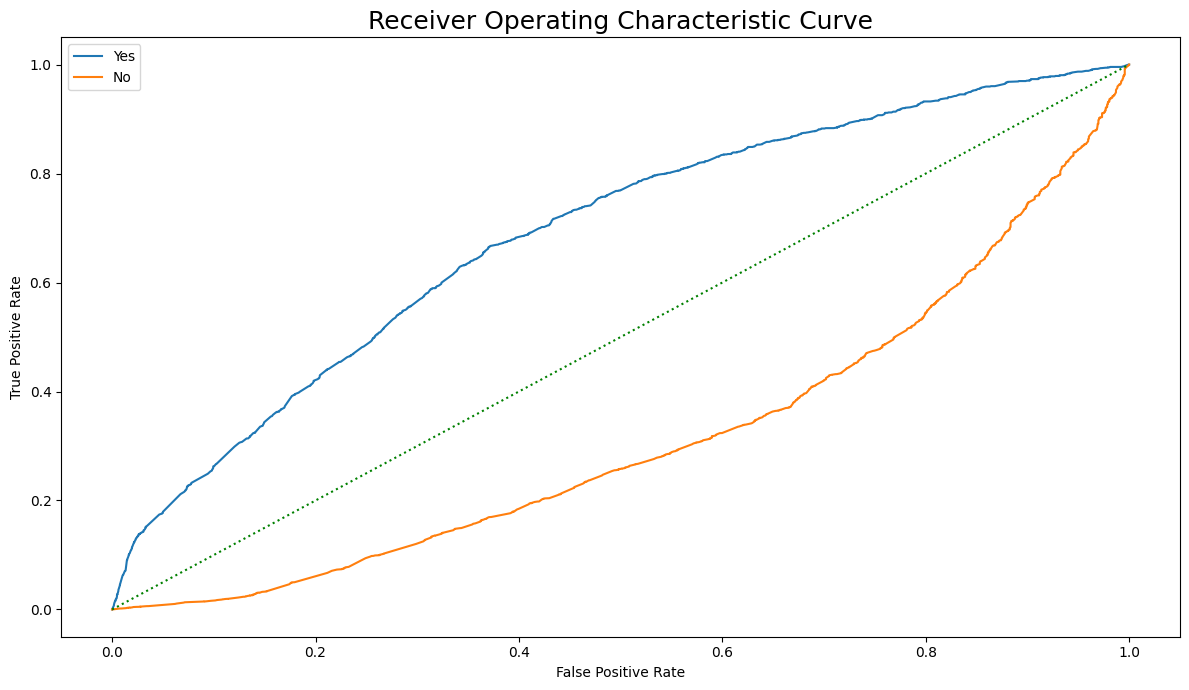

In [37]:
#define metrics
from sklearn import metrics
y_pred_proba = logr.predict_proba(X_test)
yes_probs = y_pred_proba[::,1]

# Build confusion metrics for Yes
fpr, tpr, threshold = metrics.roc_curve(y_true=y_test,  y_score=yes_probs, pos_label='yes')
fpr1, tpr1, threshold1 = metrics.roc_curve(y_true=y_test,  y_score=yes_probs, pos_label='no')

#create ROC curve
plt.plot(fpr,tpr, label="Yes")
plt.plot(fpr1,tpr1, label="No")
plt.legend(loc="upper left")
plt.title('Receiver Operating Characteristic Curve', size=18)
plt.plot([0, 1], [0, 1], color='green', linestyle=':')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
# the area under the curve auc for our model
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true=y_test, y_score=yes_probs)
print("Area under curve is {:.6f}".format(round(auc, 2)))

Area under curve is 0.690000


From the ROC plot above, the curve for Deposit = Yes lies closer to the top-left corner of the plot, indicating better model performance for this class compared to Deposit = No. The ROC AUC score of 0.69, being greater than 0.5, suggests that the classifier performs better than random guessing. In other words, it can correctly distinguish between positive and negative classes more often, identifying a higher proportion of true positives and true negatives than false positives and false negatives.

### Problem 9: Score the Model

What is the accuracy of your model?

In [39]:
# Evaluate the performance of the model, calculate the accuracy, precision, recall, and f1-score:
accuracy = accuracy_score(y_test, logr_pred)
precision = precision_score(y_test, logr_pred, average='macro')
recall = recall_score(y_test, logr_pred, average='macro')
f1 = f1_score(y_test, logr_pred, average='macro')

print("Accuracy: {:.6f}".format(accuracy))
print("Precision: {:.6f}".format(precision))
print("Recall: {:.6f}".format(recall))
print("F1-score: {:.6f}".format(f1))

Accuracy: 0.887594
Precision: 0.443797
Recall: 0.500000
F1-score: 0.470225


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
pd.DataFrame({'Model': ['Decision Tree', 'Logistic Regression'],
             'Accuracy': ['0.887513', '0.887594'],
             'Precision': ['0.443792', '0.443797'],
             'Recall': ['0.499954', '0.500000'],
             'F1_Score': ['0.470202', '0.470225'],
             'Fit_Time (ms)': ['128', '193']})

,Model,Accuracy,Precision,Recall,F1_Score,Fit_Time (ms)
0,Decision Tree,0.887513,0.443792,0.499954,0.470202,128
1,Logistic Regression,0.887594,0.443797,0.500000,0.470225,193


Results show both models accuracy is same 88% and precision, recall and F1 scores are below 50% and both models are very fast, but the Decision Tree trains a bit quicker.
Low precision frequently makes false positive predictions and low recall frequently misses actual positive instances.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [41]:
%%time
#Logistic Regression  model

lgr1_pipe = Pipeline ([
    ('transformer', preprocessor),
    ('scale', StandardScaler(with_mean=False)),
    ('model', LogisticRegression())
])

# Train the classifiers
lgr1 = lgr1_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
lgr1_pred = lgr1.predict(X_test)

# Evaluate Training and Test Scores

lgr1_train_score = lgr1.score(X_train, y_train)
print("Training Accuracy Score", lgr1_train_score)

lgr1_test_score = lgr1.score(X_test, y_test)
print("Test Accuracy Score", lgr1_test_score)

Training Accuracy Score 0.8872047448926502
Test Accuracy Score 0.8875940762320952
CPU times: user 518 ms, sys: 5.03 ms, total: 523 ms
Wall time: 376 ms


In [42]:
%%time

#KNN  model

knn_pipe = Pipeline ([
    ('transformer', preprocessor),
    ('scale', StandardScaler(with_mean=False)),
    ('model', KNeighborsClassifier())
])

# Train the classifiers
knn = knn_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
knn_pred = knn.predict(X_test)

# Evaluate Training and Test Scores

knn_train_score = knn.score(X_train, y_train)
print("Training Accuracy Score", knn_train_score)

knn_test_score = knn.score(X_test, y_test)
print("Test Accuracy Score", knn_test_score)

Training Accuracy Score 0.8792272206999411
Test Accuracy Score 0.8718944727684713
CPU times: user 55.7 s, sys: 19.2 s, total: 1min 14s
Wall time: 1min 16s


In [43]:
%%time
#Decision Tree  model

dtc1_pipe = Pipeline ([
    ('transformer', preprocessor),
    ('scale', StandardScaler(with_mean=False)),
    ('model', DecisionTreeClassifier())
])

# Train the classifiers
dtc1 = dtc1_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
dtc1_pred = dtc1.predict(X_test)

# Evaluate Training and Test Scores

dtc1_train_score = dtc1.score(X_train, y_train)
print("Training Accuracy Score", dtc1_train_score)

dtc1_test_score = dtc1.score(X_test, y_test)
print("Test Accuracy Score", dtc1_test_score)

Training Accuracy Score 0.8911935069890049
Test Accuracy Score 0.884761673545359
CPU times: user 505 ms, sys: 8.77 ms, total: 514 ms
Wall time: 514 ms


In [44]:
%%time

#SVC model

svm_pipe = Pipeline ([
    ('transformer', preprocessor),
    ('scale', StandardScaler(with_mean=False)),
    ('model', SVC())
])

# Train the classifiers
svm = svm_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
svm_pred = svm.predict(X_test)

# Evaluate Training and Test Scores

svm_train_score = svm.score(X_train, y_train)
print("Training Accuracy Score", svm_train_score)

svm_test_score = svm.score(X_test, y_test)
print("Test Accuracy Score", svm_test_score)

Training Accuracy Score 0.8873087995560335
Test Accuracy Score 0.8875131504410455
CPU times: user 43.1 s, sys: 240 ms, total: 43.3 s
Wall time: 47.4 s


In [45]:
# Display results in a Dataframe
pd.DataFrame({'Model': ['Logistic', 'KNN','Decision Tree', 'SVM'],
             'Train Time (s)': ['0.398', '72', '.488 ','42.5'],
             'Train Accuracy': ['0.8872047448926502', '0.8911935069890049', '0.8911935069890049','0.8873087995560335'],
             'Test Accuracy': ['0.8875940762320952', '0.8718944727684713', '0.8846807477543093','0.8875131504410455']})

,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic,0.398,0.8872047448926502,0.8875940762320952
1,KNN,72,0.8911935069890049,0.8718944727684713
2,Decision Tree,.488,0.8911935069890049,0.8846807477543093
3,SVM,42.5,0.8873087995560335,0.8875131504410455


Results from the model comparison, Logistic Regression had the best numbers across the three metrics with lowest train time in seconds, highest training and testing accuracy scores.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [46]:
#parameters that can be passed to the pipeline - logistic regression
lgr1_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'transformer', 'scale', 'model', 'transformer__force_int_remainder_cols', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__onehotencoder', 'transformer__ordinalencoder', 'transformer__onehotencoder__categories', 'transformer__onehotencoder__drop', 'transformer__onehotencoder__dtype', 'transformer__onehotencoder__feature_name_combiner', 'transformer__onehotencoder__handle_unknown', 'transformer__onehotencoder__max_categories', 'transformer__onehotencoder__min_frequency', 'transformer__onehotencoder__sparse_output', 'transformer__ordinalencoder__categories', 'transformer__ordinalencoder__dtype', 'transformer__ordinalencoder__encoded_missing_value', 'transformer__ordinalencoder__handle_unknown', 'transformer__ordinalencoder__max_categories', 'transformer_

In [47]:
%%time
#Building a Logistic Regression  model

# parameter grid
parameters = {
    'model__penalty' : ['l1','l2'],
    'model__C'       : np.logspace(-3,3,7),
    'model__solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

#
# Create an instance of GridSearch Cross-validation estimator
#
gsLR = GridSearchCV(estimator=lgr1_pipe,
            param_grid=parameters,
            scoring='accuracy',
            cv=10)

# Train the LogisticRegression Classifier
#
gsLR = gsLR.fit(X_train, y_train)
gsLR_predicted = gsLR.predict(X_test)

#
# Print the training score of the best model
#
print('\n Logistic Regression - Grid Search best score -')
print(gsLR.best_score_)

#
# Print the model parameters of the best model
#
print('\nGrid Search best parameters -')
print(gsLR.best_params_)

print('\Grid Search CV Results -')
print(gsLR.cv_results_)

print("Best parameters set:")
print(gsLR.best_estimator_.steps)

#
# Print the test score of the best model
#
clfLR = gsLR.best_estimator_
print('Test accuracy: %.3f' % clfLR.score(X_test, y_test))

print("Best cross-validation score:", gsLR.best_score_)

score = gsLR.score(X_test, y_test)
print("Test Score :", score)

<unknown>:35: SyntaxWarning: invalid escape sequence '\G'
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py"


 Logistic Regression - Grid Search best score -
0.8872394393842521

Grid Search best parameters -
{'model__C': np.float64(0.001), 'model__penalty': 'l1', 'model__solver': 'liblinear'}
\Grid Search CV Results -
{'mean_fit_time': array([0.0781075 , 0.06726835, 0.12922535, 0.19745457, 0.19982932,
       0.1273176 , 0.06320529, 0.06346714, 0.29864686, 0.21335855,
       0.30181332, 0.13247466, 0.06428969, 0.06602898, 1.47837243,
       0.22117271, 0.18357143, 0.14158084, 0.06271355, 0.06364999,
       1.08819456, 0.1917417 , 0.18292012, 0.15969448, 0.10438404,
       0.10408566, 0.15004253, 0.17111733, 0.17823551, 0.14777584,
       0.06889095, 0.06589236, 0.13241041, 0.25228794, 0.17919629,
       0.14893105, 0.06551335, 0.0640161 , 0.12277701, 0.17177613,
       0.22011962, 0.20025213]), 'std_fit_time': array([0.0165808 , 0.00495815, 0.00764283, 0.00803874, 0.00760824,
       0.00902743, 0.00465486, 0.00193685, 0.05990977, 0.08533962,
       0.12552874, 0.00987419, 0.00299962, 0.0045463

In [48]:
#parameters that can be passed to the pipeline - KNN
knn_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'transformer', 'scale', 'model', 'transformer__force_int_remainder_cols', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__onehotencoder', 'transformer__ordinalencoder', 'transformer__onehotencoder__categories', 'transformer__onehotencoder__drop', 'transformer__onehotencoder__dtype', 'transformer__onehotencoder__feature_name_combiner', 'transformer__onehotencoder__handle_unknown', 'transformer__onehotencoder__max_categories', 'transformer__onehotencoder__min_frequency', 'transformer__onehotencoder__sparse_output', 'transformer__ordinalencoder__categories', 'transformer__ordinalencoder__dtype', 'transformer__ordinalencoder__encoded_missing_value', 'transformer__ordinalencoder__handle_unknown', 'transformer__ordinalencoder__max_categories', 'transformer_

In [49]:
%%time
#Building a KNN Grid Search

# parameter grid
param_grid = {"model__n_neighbors": range(1, 18, 2)}

# Perform grid search with cross-validation
gsknn = GridSearchCV(knn_pipe, param_grid, cv=10, scoring='accuracy')
gsknn.fit(X_train, y_train)

gsknn_predicted = gsknn.predict(X_test)

#
# Print the training score of the best model
#
print('\nK Nearest Neighbor - Grid Search best score -')
print(gsknn.best_score_)

#
# Print the model parameters of the best model
#
print('\nGrid Search best parameters -')
print(gsknn.best_params_)

print('\Grid Search CV Results -')
print(gsknn.cv_results_)

print("Best parameters set:")
print(gsknn.best_estimator_.steps)

#
# Print the test score of the best model
#
clfknn = gsknn.best_estimator_
print('Test accuracy: %.3f' % clfknn.score(X_test, y_test))

print("Best cross-validation score:", gsknn.best_score_)

scoreknn = gsknn.score(X_test, y_test)
print("Test Score :", scoreknn)

<unknown>:24: SyntaxWarning: invalid escape sequence '\G'



K Nearest Neighbor - Grid Search best score -
0.8864069611761135

Grid Search best parameters -
{'model__n_neighbors': 17}
\Grid Search CV Results -
{'mean_fit_time': array([0.10918403, 0.11076286, 0.10621946, 0.10684178, 0.10487556,
       0.10099618, 0.0999929 , 0.09771683, 0.10279322]), 'std_fit_time': array([0.02404864, 0.02969163, 0.02338435, 0.02493755, 0.02385485,
       0.01801217, 0.01959486, 0.02003579, 0.02241174]), 'mean_score_time': array([3.7693572 , 3.59741359, 3.56968732, 3.64652226, 3.59565985,
       3.61020126, 3.62725689, 3.61319337, 3.63078883]), 'std_score_time': array([0.34422054, 0.19340298, 0.19904357, 0.20595404, 0.19237689,
       0.18823776, 0.21033271, 0.19836867, 0.22134029]), 'param_model__n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11, 13, 15, 17],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value=999999), 'params': [{'model__n_neighbors': 1}, {'model__n_neighbors': 3}, {'model__n

In [50]:
# parameters that can be passed to the pipeline - decision tree
dtc1_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'transformer', 'scale', 'model', 'transformer__force_int_remainder_cols', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__onehotencoder', 'transformer__ordinalencoder', 'transformer__onehotencoder__categories', 'transformer__onehotencoder__drop', 'transformer__onehotencoder__dtype', 'transformer__onehotencoder__feature_name_combiner', 'transformer__onehotencoder__handle_unknown', 'transformer__onehotencoder__max_categories', 'transformer__onehotencoder__min_frequency', 'transformer__onehotencoder__sparse_output', 'transformer__ordinalencoder__categories', 'transformer__ordinalencoder__dtype', 'transformer__ordinalencoder__encoded_missing_value', 'transformer__ordinalencoder__handle_unknown', 'transformer__ordinalencoder__max_categories', 'transformer_

In [51]:
%%time
#Building a Decision Tree Grid Search

# parameter grid

#
# Create grid parameters for hyperparameter tuning
#
params =  {
    'model__min_samples_leaf': [1, 2, 3],
    'model__max_depth': [1, 2, 3],
    'model__criterion': ['entropy','gini']
}

# Create an instance of GridSearch Cross-validation estimator
#
gsDTC = GridSearchCV(estimator=dtc1_pipe,
                     param_grid = params,
                     cv=10,
                     verbose=2,
                     n_jobs=1)

# Train the DecisionTreeClassifier Classifier
#
gsDTC = gsDTC.fit(X_train, y_train)
gsDTC_predicted = gsDTC.predict(X_test)
#
# Print the training score of the best model
#
print('\nDecision Tree Classifier - Grid Search best score -')
print(gsDTC.best_score_)

#
# Print the model parameters of the best model
#
print('\nGrid Search best parameters -')
print(gsDTC.best_params_)

print('\Grid Search CV Results -')
print(gsDTC.cv_results_)

print("Best parameters set:")
print(gsDTC.best_estimator_.steps)

#
# Print the test score of the best model
#
clfDTC = gsDTC.best_estimator_
print('Test accuracy: %.3f' % clfDTC.score(X_test, y_test))

print("Best cross-validation score:", gsDTC.best_score_)

score = gsDTC.score(X_test, y_test)
print("Test Score :", score)

<unknown>:38: SyntaxWarning: invalid escape sequence '\G'


Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1; total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1; total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1; total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1; total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1; total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1; total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1; total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1; total time=   0.1s
[CV] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1; total time=   0.1s
[CV] END model__criterion=en

In [52]:
#  parameters that can be passed to the pipeline - SVM
svm_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'transformer', 'scale', 'model', 'transformer__force_int_remainder_cols', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__onehotencoder', 'transformer__ordinalencoder', 'transformer__onehotencoder__categories', 'transformer__onehotencoder__drop', 'transformer__onehotencoder__dtype', 'transformer__onehotencoder__feature_name_combiner', 'transformer__onehotencoder__handle_unknown', 'transformer__onehotencoder__max_categories', 'transformer__onehotencoder__min_frequency', 'transformer__onehotencoder__sparse_output', 'transformer__ordinalencoder__categories', 'transformer__ordinalencoder__dtype', 'transformer__ordinalencoder__encoded_missing_value', 'transformer__ordinalencoder__handle_unknown', 'transformer__ordinalencoder__max_categories', 'transformer_

In [53]:
%%time
#Building a Support Vector Machine Grid Search

#Redfined the Pipeline
svm_pipegs = Pipeline ([
    ('transformer', preprocessor),
    ('scale', StandardScaler(with_mean=False)),
    ('model', SVC(probability=False))
])

# parameter grid

param_grid = {'model__C': [0.1,1, 10, 100], 'model__gamma': [1,0.1,0.01,0.001],'model__kernel': ['rbf', 'poly', 'sigmoid']}

param_grid_svc = [{
                    'model__C': [ 0.1, 0.5, 1.0 ],
                    'model__kernel': ['linear']
                  },
                 {
                    'model__C': [ 0.1, 0.5, 1.0 ],
                    'model__gamma': [0.1, 0.5, 1.0 ],
                    'model__kernel': ['rbf', 'poly', 'sigmoid']
                 }]

param_grid_svc1 = {
                    'model__C': [ 0.1, 0.5, 1.0 ],
                    'model__gamma': [0.1, 0.5, 1.0 ],
                    'model__kernel': ['rbf', 'poly', 'sigmoid']
                 }

param_grid_svc2 = {
                    'model__C': [ 0.1, 0.5, 1.0 ],
                    'model__kernel': ['rbf','linear']
                 }
#

#

#
# Create an instance of GridSearch Cross-validation estimator
#
gsSVC = GridSearchCV(estimator=svm_pipegs,
                     param_grid = param_grid_svc2,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the SVM classifier
#
gsSVC.fit(X_train, y_train)
gsSVC_predicted = gsSVC.predict(X_test)

#
# Print the training score of the best model
#
print('\nSupport Vector Machine - Grid Search best score -')
print(gsSVC.best_score_)

#
# Print the model parameters of the best model
#
print('\nGrid Search best parameters -')
print(gsSVC.best_params_)

print('\Grid Search CV Results -')
print(gsSVC.cv_results_)

print("Best parameters set:")
print(gsSVC.best_estimator_.steps)

#
# Print the test score of the best model
#
clfSVC = gsSVC.best_estimator_
print('Test accuracy: %.3f' % clfSVC.score(X_test, y_test))

print("Best cross-validation score:", gsSVC.best_score_)

scoreSVC = gsSVC.score(X_test, y_test)
print("Test Score :", scoreSVC)

<unknown>:65: SyntaxWarning: invalid escape sequence '\G'



Support Vector Machine - Grid Search best score -
0.8872394393842521

Grid Search best parameters -
{'model__C': 0.1, 'model__kernel': 'rbf'}
\Grid Search CV Results -
{'mean_fit_time': array([13.50218585,  9.10593948, 15.28012495, 10.50615616, 16.4741215 ,
       12.28006277]), 'std_fit_time': array([0.20918371, 0.32716269, 0.24030731, 1.27625535, 0.27367261,
       5.18907112]), 'mean_score_time': array([1.12073405, 0.84277372, 1.15038371, 0.86224854, 1.1741353 ,
       0.94204724]), 'std_score_time': array([0.17223026, 0.11457792, 0.12318343, 0.09431846, 0.14926997,
       0.13861668]), 'param_model__C': masked_array(data=[0.1, 0.1, 0.5, 0.5, 1.0, 1.0],
             mask=[False, False, False, False, False, False],
       fill_value=1e+20), 'param_model__kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
             mask=[False, False, False, False, False, False],
       fill_value=np.str_('?'),
            dtype=object), 'params': [{'model__C': 0.1, 'm

**Results from each Model:**

Logistic Regression  model:

Grid Search best parameters -
{'model__C': np.float64(0.001), 'model__penalty': 'l1', 'model__solver': 'liblinear'}

Test accuracy: 0.888

Best cross-validation score: 0.8872394393842521

Test Score : 0.8875940762320952

Wall time: 1min 25s



KNN Grid Search:

Grid Search best parameters -
{'model__n_neighbors': 17}

Test accuracy: 0.887

Best cross-validation score: 0.8864069611761135

Test Score : 0.8872703730678967

Wall time: 6min 27s



Decision Tree:

Grid Search best parameters -
{'model__criterion': 'entropy', 'model__max_depth': 1, 'model__min_samples_leaf': 1}

Grid Search best score -0.8872394393842521

Test accuracy: 0.888

Test Score : 0.8875940762320952

Wall time: 23.2 s


SVM:

Grid Search best parameters -{'model__C': 0.1, 'model__kernel': 'rbf'}

Best cross-validation score: 0.8872394393842521

Test accuracy: 0.888

Test Score : 0.8875940762320952

Wall time: 13min 44s


##### Questions
Although the dataset is heavily imbalanced toward unsuccessful marketing campaigns, the models above can still be useful for identifying the key factors contributing to campaign failure.

The model provides insights into customer segments that are more likely to respond positively to marketing campaigns. For instance, a higher success rate was observed among customers contacted via cellular channels, indicating that incorporating contemporary communication methods such as text messaging and social media could improve campaign effectiveness.